In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, RepeatedKFold,RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [32]:
pip install numpy==1.24.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.



  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0


In [43]:
df = pd.read_csv(r"C:\Users\ashwin s\Desktop\credit_risk_dataset.csv")

In [44]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [46]:
df.shape[0],df.shape[1]

(32581, 12)

In [47]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [48]:
dups = df.duplicated()
dups.value_counts() #There are 165 Duplicated rows

False    32416
True       165
dtype: int64

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.shape[0],df.shape[1]

(32416, 12)

In [51]:
dups = df.duplicated()
dups.value_counts() #There are 165 Duplicated rows

False    32416
dtype: int64

In [52]:
ccol=df.select_dtypes(include=["object"]).columns
ncol=df.select_dtypes(include=["int","float"]).columns

In [53]:
ccol #number of categorical columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [54]:
ncol # no of numerical columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

loan_int_rate describes the interest rate offered by loans lenders (banks or financial institution). Lot of cariation between banks when comes to interest so we drop it.

In [55]:
df.drop(['loan_int_rate'],axis=1,inplace=True)

In [56]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [57]:
df.columns


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

analysising the target variable

In [58]:
df["loan_status"].value_counts(normalize=True)

0    0.781312
1    0.218688
Name: loan_status, dtype: float64

target variable is very imbalanced

In [59]:
df.isnull().any()


person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [60]:
df.isna().sum()


person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             887
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [83]:
df.corr()

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173293           0.163001   
person_income                 0.173293       1.000000           0.133903   
person_emp_length             0.163001       0.133903           1.000000   
loan_amnt                     0.050680       0.265947           0.113183   
loan_status                  -0.022698      -0.145005          -0.082817   
loan_percent_income          -0.042300      -0.254472          -0.053999   
cb_person_cred_hist_length    0.859215       0.117614           0.144889   

                            loan_amnt  loan_status  loan_percent_income  \
person_age                   0.050680    -0.022698            -0.042300   
person_income                0.265947    -0.145005            -0.254472   
person_emp_length            0.113183    -0.082817            -0.053999   
loan_amnt                    1.000000     0.105736             0.572824   
loan_status                  0.105736     1.000000             0.379697   
loan_percent_income          0.572824     0.379697             1.000000   
cb_person_cred_hist_length   0.041865    -0.016498            -0.031457   

                            cb_person_cred_hist_length  
person_age                                    0.859215  
person_income                                 0.117614  
person_emp_length                             0.144889  
loan_amnt                                     0.041865  
loan_status                                  -0.016498  
loan_percent_income                          -0.031457  
cb_person_cred_hist_length                    1.000000

# Visualizations

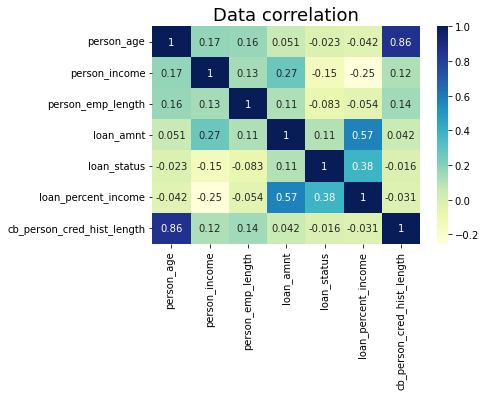

In [82]:
sns.heatmap(data=df.corr(), cmap='YlGnBu', annot=True)
plt.title('Data correlation', fontsize=18)
plt.show()

Text(0.5, 1.0, 'person_age dist.')

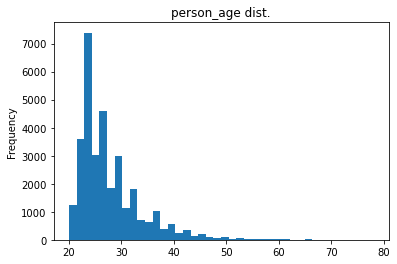

In [78]:
df[df.person_age < 80].person_age.plot.hist(bins=40)
plt.title('person_age dist.')

Text(0.5, 1.0, 'Loan Status')

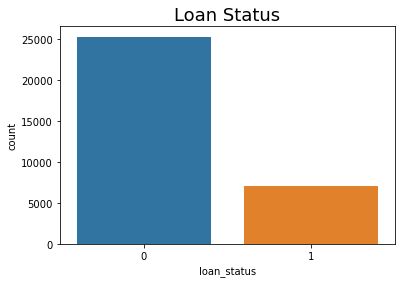

In [85]:
sns.countplot(x=df['loan_status'])
plt.title('Loan Status', fontsize=18)


Text(0.5, 1.0, 'Home ownership')

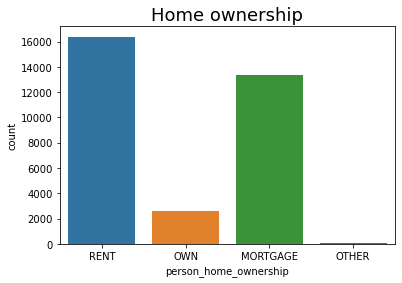

In [86]:
sns.countplot(x=df['person_home_ownership'])
plt.title('Home ownership', fontsize=18)

<AxesSubplot:>

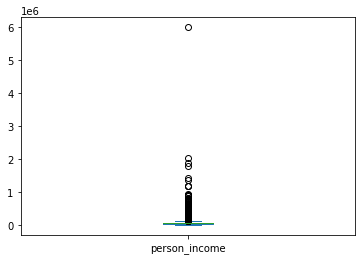

In [128]:
df['person_income'].plot.box()

this plot shows the correlation of other features with target feature

In [130]:
import plotly.express as px
corr = df.corr()['loan_status'].sort_values(ascending=False)
fig = px.bar(x = corr.keys(), y = corr.values, title = 'correlation with target value',
            labels = {'x':'Features', 'y': 'Correlation'})
fig.show()

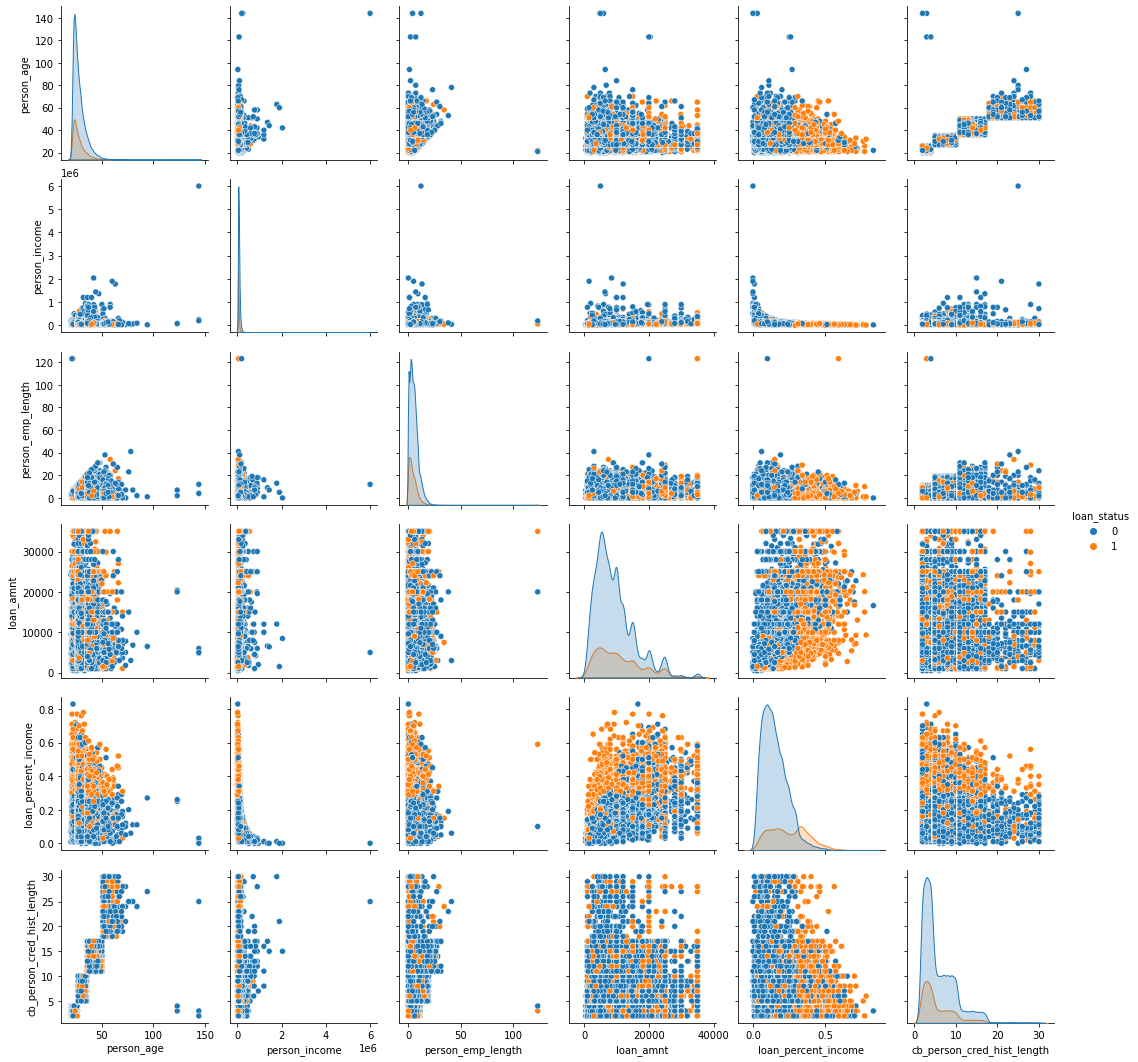

In [87]:
sns.pairplot(df, hue='loan_status')

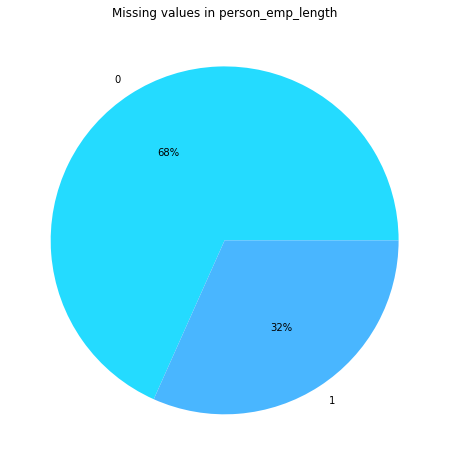

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ashwin s\\anaconda3\\Lib\\site-packages\\~-mpy\\linalg\\lapack_lite.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [63]:
import warnings

# Filter a specific warning by category and message
warnings.filterwarnings("ignore")

## Missing values in each target class:
#l=df.groupby(["loan_status"])["loan_int_rate"].apply(lambda x:x.isnull().sum())
p=df.groupby(["loan_status"])["person_emp_length"].apply(lambda x:x.isnull().sum())

fig,ax=plt.subplots(1,1,figsize=(8,8))
# ax[0].set_title("Missing values in loan_int_rate")
# ax[0].pie(l.values, labels=l.index, colors=sns.color_palette('bright'), autopct='%.0f%%')

ax.set_title("Missing values in person_emp_length")
ax.pie(p.values, labels=p.index, colors=sns.color_palette('cool'), autopct='%.0f%%')
fig.show()

In [96]:
df['income_group'] = pd.cut(df['person_income'], bins=
                           [0, 25000, 50000, 75000, 100000, float('inf')],
                           labels=['low', 'l-middle', 'middle', 'h-middle', 'high'])

In [97]:
df['income_group']


0          middle
1             low
2             low
3          middle
4          middle
           ...   
32576      middle
32577        high
32578    h-middle
32579        high
32580    l-middle
Name: income_group, Length: 32416, dtype: category
Categories (5, object): ['low' < 'l-middle' < 'middle' < 'h-middle' < 'high']

In [98]:
df['loan_amnt_group'] = pd.cut(df['loan_amnt'], bins=
                                 [0, 10000, 15000, float('inf')],
                                 labels=['small', 'medium', 'large'])

In [99]:
df['loan_amnt_group']

0         large
1         small
2         small
3         large
4         large
          ...  
32576     small
32577     large
32578     large
32579    medium
32580     small
Name: loan_amnt_group, Length: 32416, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

In [100]:
df['loan_to_income'] = df['loan_amnt'] / df['person_income']
df['loan_to_income']

0        0.593220
1        0.104167
2        0.572917
3        0.534351
4        0.643382
           ...   
32576    0.109434
32577    0.146875
32578    0.460526
32579    0.100000
32580    0.154167
Name: loan_to_income, Length: 32416, dtype: float64

In [102]:
y_credit = df['loan_status']
X_credit = df.drop(['loan_status'], axis=1)

In [103]:
X_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'income_group', 'loan_amnt_group',
       'loan_to_income'],
      dtype='object')

In [104]:
label_encode_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'income_group', 'loan_amnt_group']
label_encoder = LabelEncoder()

for col in label_encode_cols:
    X_credit[col] = label_encoder.fit_transform(X_credit[col])
    
X_credit = pd.get_dummies(X_credit, columns=label_encode_cols)

In [105]:
X_credit.head(1)

person_age  person_income  person_emp_length  loan_amnt  \
0          22          59000              123.0      35000   

   loan_percent_income  cb_person_cred_hist_length  loan_to_income  \
0                 0.59                           3         0.59322   

   person_home_ownership_0  person_home_ownership_1  person_home_ownership_2  \
0                        0                        0                        0   

   ...  cb_person_default_on_file_0  cb_person_default_on_file_1  \
0  ...                            0                            1   

   income_group_0  income_group_1  income_group_2  income_group_3  \
0               0               0               0               0   

   income_group_4  loan_amnt_group_0  loan_amnt_group_1  loan_amnt_group_2  
0               1                  1                  0                  0  

[1 rows x 34 columns]

In [106]:
scaler = StandardScaler()
X_credit = scaler.fit_transform(X_credit)

In [107]:
X_credit[0]

array([-0.90447055, -0.11435433, 28.51565838,  4.01828724,  3.92986465,
       -0.69261376,  3.94680965, -0.83779193, -0.05727755, -0.29300856,
        0.98956579, -0.43655799, -0.49651738, -0.35312379, -0.47863269,
        2.21268212, -0.46101881, -0.7020901 , -0.68666937, -0.49782033,
        2.82040709, -0.17497746, -0.08654645, -0.0444774 , -2.15806455,
        2.15806455, -0.40876975, -0.38533801, -0.74394732, -0.28593588,
        1.54335704,  2.36629426, -0.48101665, -1.39502889])

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_credit, y_credit, test_size= 0.2, random_state=0)

In [118]:
X_training.shape, y_training.shape

((25932, 34), (25932,))

Encountered NAN values in x

In [133]:
from sklearn.impute import SimpleImputer

#replacing with nan with mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_imputed, y_train)

Why Logistic Regression?
Logistic Regression provides clear insights into which factors influence credit risk.

Widely used and trusted in finance and credit risk assessment.

Computationally efficient and can handle large datasets.

Balances precision and recall, vital for minimizing false positives and false negatives.

In [134]:
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

LogisticRegression()

In [135]:
y_pred = model.predict(X_test_imputed)

In [136]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Classification report provides a breakdown of several important metrics for each class in a multi-class classification problem. These metrics include precision, recall, F1-score, and support.




In [137]:
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8769278223318939
ROC-AUC Score: 0.7723073675032055
Confusion Matrix:
[[4878  240]
 [ 558  808]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5118
           1       0.77      0.59      0.67      1366

    accuracy                           0.88      6484
   macro avg       0.83      0.77      0.80      6484
weighted avg       0.87      0.88      0.87      6484



Interpredability:
The Logistic Regression model used for credit risk prediction is relatively interpretable. This interpretability arises from the coefficients assigned to each feature, which represent the strength and direction of their influence on the prediction

Some interpretation:
Credit Score (person_age): Higher age tends to correlate with more stable financial behavior, resulting in a lower probability of default.

Income (person_income): Higher income is associated with a reduced risk of default since applicants with higher incomes have greater financial capacity to meet loan obligations.

Employment Length (person_emp_length): Longer employment history indicates stability, potentially reducing the likelihood of default.

Loan Amount (loan_amnt): Larger loan amounts may increase the risk of default, as they represent a larger financial commitment for the borrower.

Recommendations for XYZ Fintech:

Credit Score Thresholds: Set minimum credit score thresholds for loan approval. Reject applicants below this threshold to reduce risk.

Regular Model Updates: Periodically update the credit risk model using new data to ensure its predictive accuracy and relevance.

Credit Education: Provide financial education and counseling to borrowers, especially those at higher risk. This can help them better manage their finances and reduce the chance of default.

    